# DFS & BFS

## 설명

* 탐색이란 많은 양의 데이터 중에서 원하는 데이터를 찾는 과정이다.
* 대표적인 그래프 탐색 알고리즘으로 DFS와 BFS가 있다.

## 배경 지식

### Stack

* 먼저 들어온 데이터가 나중에 나가는 형식

In [2]:
stack = []

stack.append(1)
stack.append(2)
stack.pop()
stack.append(3)
stack.append(4)
stack.pop()

print(stack)

[1, 3]


### Queue

* 먼저 들어온 데이터가 먼저 나가는 형식

In [3]:
from collections import deque

queue = deque()

queue.append(1)
queue.append(2)
queue.popleft()
queue.append(3)
queue.append(4)
queue.popleft()

print(queue)

deque([3, 4])


### 재귀 함수 (Recursive Function)

* 자기 자신을 다시 호출하는 함수

In [4]:
N = int(input())
def fac(N):
    if N <= 1:
        return 1
    return N * fac(N-1)

print(fac(N))

5
120


## DFS

* 깊이 우선 탐색이라고 불리며 깊은 부분을 우선적으로 탐색하는 알고리즘이다.
* DFS는 스택 자료구조(혹은 재귀함수)를 이용한다.

### 동작 과정
    1. 탐색 시작 노드를 스택에 삽입하고 방문 처리를 한다.
    2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 그 노드를 스택에 넣고 방문처리한다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다.
    3. 더 이상 2의 과정을 수행할 수 없을 때 까지 반복한다.

### 동작 예시
    0. 그래프를 준비한다.(방문 기준: 번호가 낮은 인접 노드 부터) 시작 노드: 1
    1. 시작 노드인 1을 스택에 삽입하고 방문 처리를 한다.
    2. 스택의 최상단 노드인 1에 방문하지 않은 인접 노드 2, 3, 8 이 있다. 이 중 가장 작은 노드인 2를 스택에 넣고 방문 처리를 한다.
    3. 스택의 최상단 노드인 2에 방문하지 않은 인접 노드 7이 있다. 따라서 7을 스택에 넣고 방문 처리를 한다.
    4. 스택의 최상단 노드인 7에 방문하지 않은 인접 노드 6, 8이 있다. 이 중 가장 작은 노드인 6을 스택에 넣고 방문 처리를 한다.
    5. 스택의 최상단 노드인 6에 방문하지 않은 인접 노드가 없다. 따라서 스택에서 6을 꺼내준다.
    6. 스택의 최상단 노드인 7에 방문하지 않은 인접 노드 8이 있다. 따라서 8을 스택에 넣고 방문 처리한다.
    7. 이러한 과정으로 1->2->7->6->8->3->4->5 순으로 탐색한다.

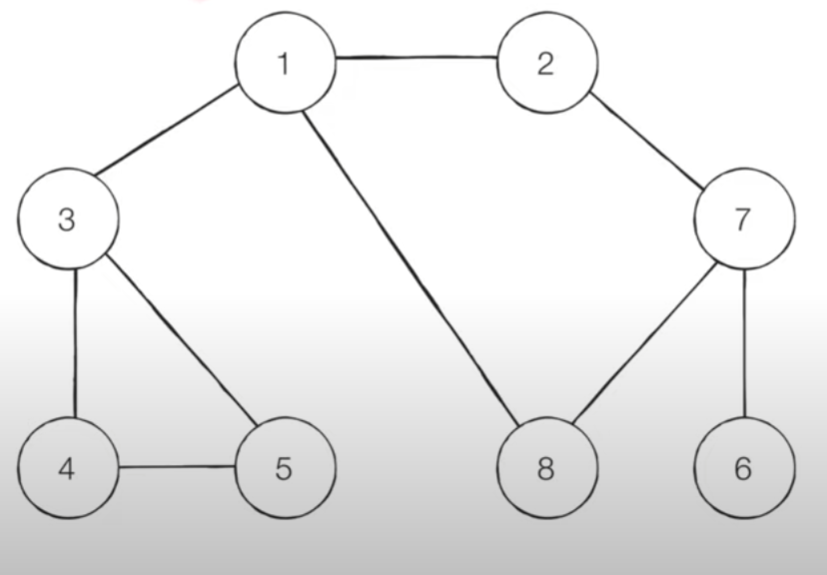

### 예시

In [6]:
# DFS 메소드 정의
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end=' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 반복
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)

In [7]:
# 일반적으로 그래프 문제는 node가 1부터 시작하므로 index 0의 부분을 비워두는 경우가 많음
# 각 node가 연결된 정보를 표현(2차원 리스트 형태)
graph =[
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 각 node가 방문된 정보를 표현(1차원 리스트)
visited = [False] * 9

dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

## BFS

* 너비 우선 탐색이라고 부르며, 그래프의 가까운 노드부터 우선적으로 탐색하는 알고리즘이다.
* 큐 자료구조를 이용한다.

### 동작 과정
    1. 탐색 시작 노드에 큐를 삽입하고 방문 처리를 해준다.
    2. 큐에서 노드를 꺼낸 뒤에 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리한다.
    3. 더 이상 2의 과정을 수행할 수 없을 때까지 반복한다.

### 동작 예시
    0. 그래프를 준비한다. (방문 기준: 번호가 낮은 인접 노드부터) 시작 노드: 1
    1. 시작 노드인 1을 큐에 삽입하고 방문 처리를 한다.
    2. 큐에서 노드 1을 꺼내 방문하지 않은 노드 2, 3, 8을 큐에 삽입하고 방문 처리한다.
    3. 큐에서 노드 2를 꺼내 방문하지 않은 인접 노드 7을 큐에 삽입하고 방문 처리한다.
    4. 큐에서 노드 3을 꺼내 방문하지 않은 인접 노드 4, 5를 큐에 삽입하고 방문 처리한다.
    5. 큐에서 노드 8을 꺼내고 방문하지 않은 인접 노드가 없으므로 무시한다.
    6. 이러한 과정으로 1->2->3->8->7->4->5->6 순으로 탐색한다. 

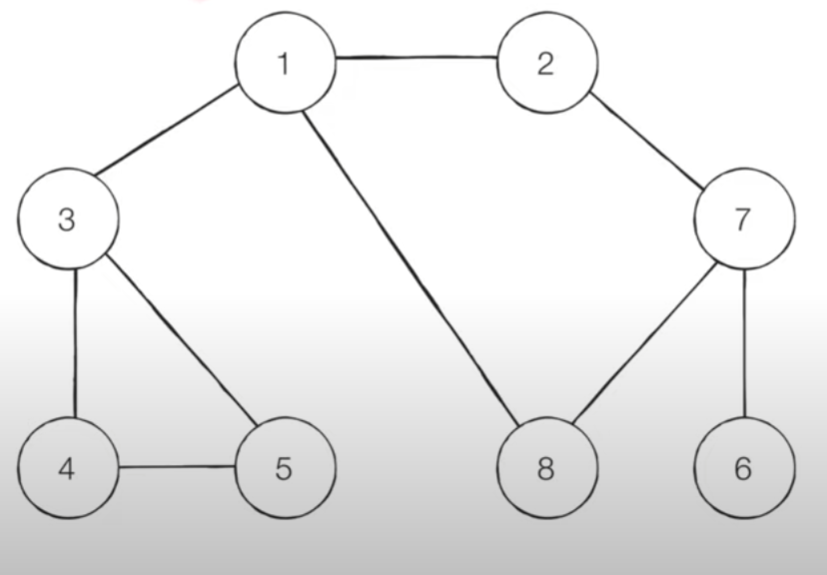

### 예시

In [4]:
from collections import deque

# BFS 메소드 정의
def bfs(graph, start, visited):
    # queue구현을 위해 deque 라이브러리를 사용한다.
    queue = deque([start])
    # 현재 노드 방문 처리
    visited[start] = True
    # queue가 빌 때까지 반복
    while queue:
        v = queue.popleft()
        print(v, end =' ')
        # 아직 방문하지 않은 인접 노드들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

In [5]:
# 일반적으로 그래프 문제는 node가 1부터 시작하므로 index 0의 부분을 비워두는 경우가 많음
# 각 node가 연결된 정보를 표현(2차원 리스트 형태)
graph =[
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 각 node가 방문된 정보를 표현(1차원 리스트)
visited = [False] * 9

bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 